In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

In [2]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
pd.options.display.max_columns=30

In [7]:
df_shinhan = pd.read_csv('../data/innovation/Shinhan/CARD_SPENDING/CARD_SPENDING_190809.txt', sep='	')

In [8]:
df_shinhan.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20180401,110,515,21,F,30,4,180
1,20180401,110,515,21,F,55,4,22
2,20180401,110,515,21,M,20,35,184
3,20180401,110,515,21,M,25,70,425
4,20180401,110,515,21,M,30,18,82


In [9]:
SH_rename_cols_dict = {'STD_DD':'DATE'}
df_shinhan.rename(columns=SH_rename_cols_dict, inplace=True)

* Add GU_NM, DONG_NM

In [10]:
SH_DONG_NM_list = [str(df_shinhan.GU_CD[i])+str(df_shinhan.DONG_CD[i]) for i in range(len(df_shinhan))]

In [11]:
df_shinhan.DONG_CD = SH_DONG_NM_list

In [12]:
DONG_temp1 = list(df_shinhan.DONG_CD.unique())

In [13]:
DONG_temp2 = ["청운효자동","사직동", "삼청동", "부암동", "평창동", "무악동",
              "교남동", "가회동", "종로1.2.3.4가동", "종로5.6가동", "이화동",
              "혜화동", "창신1동", "창신2동", "창신3동", "숭인1동", "숭인2동",
              "월계1동", "월계2동", "월계3동", "공릉1동", "공릉2동", "하계1동",
              "하계2동", "중계본동", "중계1동", "중계4동", "중계2.3동", "상계1동",
              "상계2동", "상계3.4동", "상계5동", "상계6.7동", "상계8동", "상계9동", "상계10동"]

In [14]:
len(DONG_temp1), len(DONG_temp2)

(36, 36)

In [15]:
SH_GU_NM_dict = {110:'종로구', 350:'노원구'}
SH_DONG_NM_dict = dict()
for i in range(len(DONG_temp1)):
    SH_DONG_NM_dict[DONG_temp1[i]]=DONG_temp2[i]

In [16]:
SH_GU_NM_list = [SH_GU_NM_dict[i] for i in df_shinhan.GU_CD]

df_shinhan['GU_NM']=SH_GU_NM_list

In [17]:
SH_DONG_NM_list = [SH_DONG_NM_dict[i] for i in df_shinhan.DONG_CD]
df_shinhan['DONG_NM'] = SH_DONG_NM_list

# EDA - 업종별 매출액 높은 순 뽑기

In [18]:
df_shinhan.head()

,DATE,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,GU_NM,DONG_NM
0,20180401,110,110515,21,F,30,4,180,종로구,청운효자동
1,20180401,110,110515,21,F,55,4,22,종로구,청운효자동
2,20180401,110,110515,21,M,20,35,184,종로구,청운효자동
3,20180401,110,110515,21,M,25,70,425,종로구,청운효자동
4,20180401,110,110515,21,M,30,18,82,종로구,청운효자동


In [19]:
df_USE_CNT_top = df_shinhan.groupby(['MCT_CAT_CD']).sum().reset_index().sort_values(by='USE_CNT', ascending=True)

In [20]:
top_list = list(df_USE_CNT_top.MCT_CAT_CD)

In [21]:
top_list_dict = {31:'electro', 60:'car_sell', 30:'furniture', 34:'optical', 32:'kitchen',
           52:'affair', 92:'repair_survice', 21:'leisure_busi', 43:'texitle', 22:'culture',
           62:'car_repair', 35:'Appliances', 44:'stuff', 42:'cloth', 81:'grocery', 71:'public_health',
           50:'book', 33:'fuel', 70:'medical', 40:'circle', 80:'food',
                10:'accum', 20:'leisure_goods'}

In [22]:
top_list_name = [top_list_dict[i] for i in top_list]

In [23]:
df_USE_CNT_top['cate']=top_list_name

In [30]:
df_viz = df_USE_CNT_top[['cate', 'USE_CNT']].set_index('cate')

In [31]:
comma_f = lambda x:format(x, ',')

In [36]:
df_viz['USE_CNT_comma'] = df_viz.USE_CNT.map(comma_f)

([<matplotlib.axis.XTick at 0x215a4d41048>,
 <a list of 23 Text xticklabel objects>)

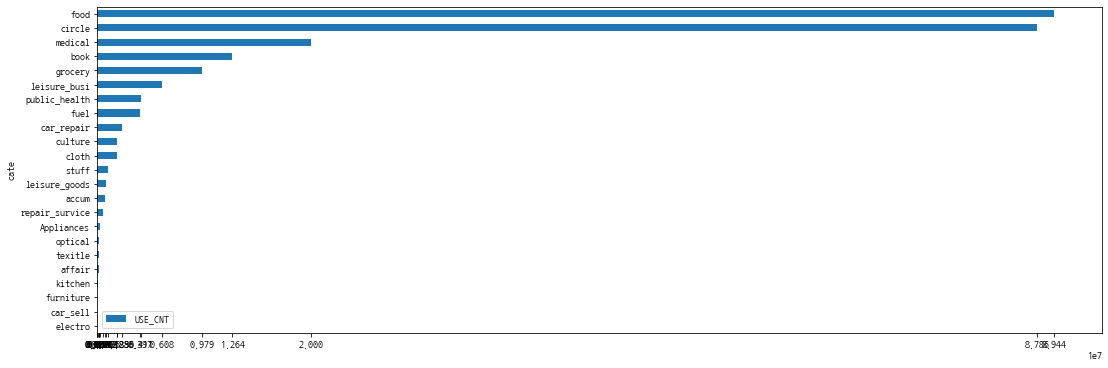

In [37]:
df_viz.plot(kind='barh', figsize=(18,6))
plt.legend()
plt.xticks(df_viz.USE_CNT.values)

# EDA - 미세먼지와 상관관계보기

In [28]:
df_asos_no = pd.read_csv('../data/innovation/Merge_data/df_asos_nowon.csv')
df_asos_jong = pd.read_csv('../data/innovation/Merge_data/df_asos_jongro.csv')

In [182]:
df_asos = pd.concat([df_asos_no, df_asos_jong]).groupby(['DATE', 'GU_NM']).sum().reset_index()

* Merge

In [183]:
df_total = df_shinhan.merge(df_asos, on=['DATE', 'GU_NM'])

In [39]:
df_total.corr()  # USE_CNT와 직접적인 상관관계는 당연하게도(?) 안보임

,DATE,GU_CD,MCT_CAT_CD,AGE_CD,USE_CNT,USE_AMT,pm10,pm25,humi,temp,CONTENT,강수량(mm)
DATE,1.000000,0.001035,0.000828,0.007024,-0.001972,0.006404,0.596303,0.565091,-0.366686,-0.591537,0.229700,-0.140595
GU_CD,0.001035,1.000000,0.024424,0.011107,-0.048017,-0.048937,0.124990,0.066386,0.060030,-0.037325,0.000458,0.001628
MCT_CAT_CD,0.000828,0.024424,1.000000,0.032720,0.060080,0.069353,0.003579,0.001500,0.004877,-0.003290,0.013956,0.004528
AGE_CD,0.007024,0.011107,0.032720,1.000000,-0.100922,0.005704,0.006658,0.005492,-0.001824,-0.003976,0.008655,-0.001281
USE_CNT,-0.001972,-0.048017,0.060080,-0.100922,1.000000,0.755094,-0.006689,-0.003635,-0.003877,0.006188,0.001178,-0.004783
USE_AMT,0.006404,-0.048937,0.069353,0.005704,0.755094,1.000000,-0.000467,0.001894,-0.009226,-0.005074,-0.003342,-0.005102
pm10,0.596303,0.124990,0.003579,0.006658,-0.006689,-0.000467,1.000000,0.935125,-0.346496,-0.470841,0.351189,-0.221830
pm25,0.565091,0.066386,0.001500,0.005492,-0.003635,0.001894,0.935125,1.000000,-0.220466,-0.393787,0.316291,-0.192143
humi,-0.366686,0.060030,0.004877,-0.001824,-0.003877,-0.009226,-0.346496,-0.220466,1.000000,0.482067,-0.085283,0.527165
temp,-0.591537,-0.037325,-0.003290,-0.003976,0.006188,-0.005074,-0.470841,-0.393787,0.482067,1.000000,-0.312027,0.132655


* 미세먼지와 카드이용금액과 횟수와는 상관관계가 보이지 않는다.

# 데이터변환 -  MCT_CAT_CD 열로

In [171]:
df_GU_group = df_shinhan.groupby(['DATE', 'GU_NM', 'MCT_CAT_CD'
#                                ,'SEX_CD', 'AGE_CD'
                              ]).sum()

In [41]:
df_GU_group = pd.DataFrame(df_GU_group.USE_CNT)

In [42]:
df_GU_group = df_GU_group.unstack()

In [43]:
cols_name_list = ['accum', 'leisure_goods','leisure_busi', 'culture', 'furniture', 'electro',
                  'kitchen', 'fuel', 'optical', 'Appliances', 'circle',
                  'cloth', 'texitle', 'stuff','book', 'affair',
                  'car_sell', 'car_repair', 'medical', 'public_health', 'food',
                  'grocery', 'repair_survice']

In [44]:
df_GU_group.columns = cols_name_list

In [45]:
df_GU_group.head()

accum  leisure_goods  leisure_busi  culture  furniture  \
DATE     GU_NM                                                            
20180401 노원구     723.0         1641.0       12145.0   3281.0       88.0   
         종로구    1733.0         1010.0        5252.0   3974.0        NaN   
20180402 노원구     228.0          698.0        7734.0   1621.0       32.0   
         종로구    1169.0          893.0        4525.0   1380.0        NaN   
20180403 노원구     262.0          525.0        8340.0   1264.0       37.0   

                electro  kitchen    fuel  optical  Appliances    circle  \
DATE     GU_NM                                                            
20180401 노원구        NaN     28.0  9737.0     98.0       246.0  152950.0   
         종로구        4.0     24.0   490.0    155.0       239.0   68941.0   
20180402 노원구       17.0     61.0  9813.0    295.0       613.0  142095.0   
         종로구        8.0     41.0   621.0    236.0       234.0  107246.0   
20180403 노원구       21.0     93.0  9504.0    199.0       380.0  143833.0   

                 cloth  texitle   stuff     book  affair  car_sell  \
DATE     GU_NM                                                       
20180401 노원구    2351.0     32.0   811.0   5691.0    49.0       NaN   
         종로구    3443.0    167.0  2073.0  31293.0    90.0       NaN   
20180402 노원구    2073.0     33.0   770.0   5158.0   208.0      12.0   
         종로구    2805.0    453.0  1459.0  25523.0   366.0      28.0   
20180403 노원구    1944.0     46.0   655.0   4627.0   178.0      33.0   

                car_repair  medical  public_health      food  grocery  \
DATE     GU_NM                                                          
20180401 노원구         487.0   5800.0         9722.0   89376.0  13832.0   
         종로구        6393.0   3820.0         4324.0  124912.0   9912.0   
20180402 노원구        1017.0  39514.0         6736.0   82996.0  17123.0   
         종로구        5003.0  38433.0         3780.0  157770.0  10841.0   
20180403 노원구         992.0  32280.0         6694.0   86050.0  17161.0   

                repair_survice  
DATE     GU_NM                  
20180401 노원구             529.0  
         종로구             190.0  
20180402 노원구            1761.0  
         종로구             544.0  
20180403 노원구            1278.0

In [46]:
df_shinhan_total_GU = df_GU_group.reset_index()

In [47]:
df_shinhan_total_GU.head()

,DATE,GU_NM,accum,leisure_goods,leisure_busi,culture,furniture,electro,kitchen,fuel,optical,Appliances,circle,cloth,texitle,stuff,book,affair,car_sell,car_repair,medical,public_health,food,grocery,repair_survice
0,20180401,노원구,723.0,1641.0,12145.0,3281.0,88.0,NaN,28.0,9737.0,98.0,246.0,152950.0,2351.0,32.0,811.0,5691.0,49.0,NaN,487.0,5800.0,9722.0,89376.0,13832.0,529.0
1,20180401,종로구,1733.0,1010.0,5252.0,3974.0,NaN,4.0,24.0,490.0,155.0,239.0,68941.0,3443.0,167.0,2073.0,31293.0,90.0,NaN,6393.0,3820.0,4324.0,124912.0,9912.0,190.0
2,20180402,노원구,228.0,698.0,7734.0,1621.0,32.0,17.0,61.0,9813.0,295.0,613.0,142095.0,2073.0,33.0,770.0,5158.0,208.0,12.0,1017.0,39514.0,6736.0,82996.0,17123.0,1761.0
3,20180402,종로구,1169.0,893.0,4525.0,1380.0,NaN,8.0,41.0,621.0,236.0,234.0,107246.0,2805.0,453.0,1459.0,25523.0,366.0,28.0,5003.0,38433.0,3780.0,157770.0,10841.0,544.0
4,20180403,노원구,262.0,525.0,8340.0,1264.0,37.0,21.0,93.0,9504.0,199.0,380.0,143833.0,1944.0,46.0,655.0,4627.0,178.0,33.0,992.0,32280.0,6694.0,86050.0,17161.0,1278.0


In [48]:
df_shinhan_total_GU.shape

(730, 25)

# EDA - 인구별 매출순위

In [62]:
age_list = [
    '-25_USE_AMT', '2529_USE_AMT',
         '3034_USE_AMT', '3539_USE_AMT',
            '4044_USE_AMT', '4549_USE_AMT', 
         '5054_USE_AMT', '5559_USE_AMT',
            '6064_USE_AMT', '65-_USE_AMT'
        ]

In [63]:
df_age.T

,2018-04-01 00:00:00,2018-04-02 00:00:00,2018-04-03 00:00:00,2018-04-04 00:00:00,2018-04-05 00:00:00,2018-04-06 00:00:00,2018-04-07 00:00:00,2018-04-08 00:00:00,2018-04-09 00:00:00,2018-04-10 00:00:00,2018-04-11 00:00:00,2018-04-12 00:00:00,2018-04-13 00:00:00,2018-04-14 00:00:00,2018-04-15 00:00:00,...,2019-03-17 00:00:00,2019-03-18 00:00:00,2019-03-19 00:00:00,2019-03-20 00:00:00,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-23 00:00:00,2019-03-24 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-03-30 00:00:00,2019-03-31 00:00:00
-25_USE,83822,104000,103481,102465,96332,103749,93003,77223,100592,102815,110278,109895,109725,94580,89275,...,80857,94501,96777,90132,95768,95885,86062,77213,92465,96197,95245,95913,97451,81695,75815
2529_USE,107599,109101,107242,107822,97950,112900,118525,93248,104807,106690,110254,110911,119721,116077,108110,...,109715,107775,110015,105050,109917,118927,125694,105726,109835,111625,111463,111255,121505,121536,103274
3034_USE,64406,74095,74474,74833,67330,75391,75523,55829,72309,72221,76010,77793,80344,72495,63847,...,66246,72964,75039,71122,74633,82045,77951,65085,74108,76915,75331,77325,84901,77472,64452
3539_USE,60135,74095,74854,77868,67372,75288,74787,54781,73788,74176,75563,77516,83446,71955,62339,...,63650,73011,74650,69511,73970,79228,75409,59927,72888,75229,74650,76291,82173,73927,60531
4044_USE,60359,66928,67831,72841,61752,67932,72717,52535,65835,66505,67924,68272,73577,69008,59674,...,61774,65536,68274,63301,67419,72515,74715,58873,67938,69388,68331,69944,75730,71873,58771
4549_USE,72463,80829,80635,86557,72671,82370,87849,64559,80215,80046,81591,83199,86870,84305,73125,...,76351,78788,82275,75894,82584,85986,90694,72863,80608,83919,83423,84248,89530,87615,74422
5054_USE,52054,62726,63191,63848,57377,62302,62712,46286,62185,62069,64935,62937,66345,61996,51024,...,58546,66640,69074,64897,68266,70953,71991,55936,67460,69700,69075,70462,73831,68377,57370
5559_USE,35952,47228,46621,47641,42916,45839,44198,32480,45839,45858,47309,46338,48174,42477,35993,...,39744,49918,49895,47876,50881,51782,47832,37775,48768,50272,50156,50259,51963,46007,37934
6064_USE,20857,29307,29763,29413,26067,28008,26102,17739,29157,29330,30196,29346,30119,24812,20694,...,24163,34213,34639,31899,32930,34666,31643,23864,33717,35133,32642,33391,35146,30017,24334
65-_USE,20409,35657,36308,36334,30661,33445,28295,18568,37113,35734,35301,34536,35460,25831,21307,...,25440,42543,43162,38169,41267,41148,32833,23833,42476,42291,41274,41428,42506,32404,24371


In [64]:
age_top_list = [df_age.T.loc[i].sum() for i in df_age.T.index]

In [65]:
df_age_top = pd.DataFrame(df_age.T.index, age_top_list)


In [66]:
df_age_top['SUM'] = df_age_top.index

In [67]:
df_age_top = df_age_top.set_index(df_age.T.index)
df_age_top.drop(0, axis=1, inplace=True)

In [68]:
df_age_top = df_age_top.sort_values(by='SUM', ascending=False)

<BarContainer object of 10 artists>

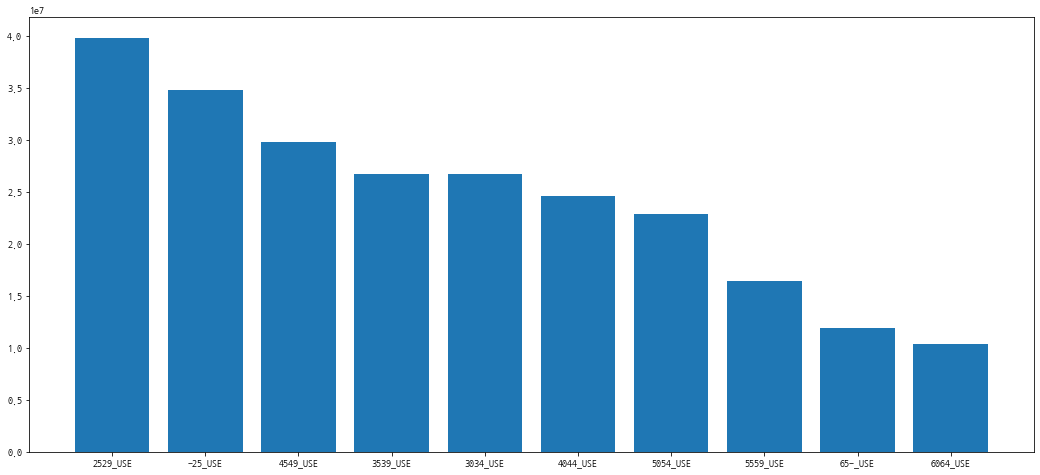

In [69]:
plt.figure(figsize=(18,8))
plt.bar(df_age_top.index, df_age_top['SUM'])

### 나이별 plot

# 데이터변환 -  AGE_CD 경향

In [184]:
df_age = df_total.groupby(['DATE', 'AGE_CD']).sum()[['USE_CNT']]

In [185]:
df_age = df_age.unstack()

In [186]:
df_age.columns = ['-25_USE',
                 '2529_USE', '3034_USE',
                 '3539_USE', '4044_USE',
                 '4549_USE', '5054_USE',
                 '5559_USE', '6064_USE',
                 '65-_USE']

In [187]:
dateidx = pd.date_range('2018-04-01', '2019-03-31')
df_age.index=dateidx

In [188]:
df_age.corr()

,-25_USE,2529_USE,3034_USE,3539_USE,4044_USE,4549_USE,5054_USE,5559_USE,6064_USE,65-_USE
-25_USE,1.000000,0.456486,0.605892,0.704560,0.625843,0.640138,0.514885,0.514210,0.369999,0.367165
2529_USE,0.456486,1.000000,0.857158,0.761525,0.860392,0.836268,0.696495,0.553822,0.439092,0.292625
3034_USE,0.605892,0.857158,1.000000,0.958357,0.946804,0.932102,0.908984,0.857404,0.761894,0.667190
3539_USE,0.704560,0.761525,0.958357,1.000000,0.953100,0.941244,0.877241,0.859321,0.744509,0.669921
4044_USE,0.625843,0.860392,0.946804,0.953100,1.000000,0.982290,0.865244,0.789814,0.670130,0.561782
4549_USE,0.640138,0.836268,0.932102,0.941244,0.982290,1.000000,0.886304,0.809876,0.690012,0.583117
5054_USE,0.514885,0.696495,0.908984,0.877241,0.865244,0.886304,1.000000,0.963303,0.922790,0.854384
5559_USE,0.514210,0.553822,0.857404,0.859321,0.789814,0.809876,0.963303,1.000000,0.964572,0.928798
6064_USE,0.369999,0.439092,0.761894,0.744509,0.670130,0.690012,0.922790,0.964572,1.000000,0.973012
65-_USE,0.367165,0.292625,0.667190,0.669921,0.561782,0.583117,0.854384,0.928798,0.973012,1.000000


In [189]:
print("20대: ", df_age.corr()["-25_USE"]["2529_USE"])
print("30대: ", df_age.corr()["3034_USE"]["3539_USE"])
print("40대: ", df_age.corr()["4044_USE"]["4549_USE"])
print("50대: ", df_age.corr()["5054_USE"]["5559_USE"])
print("60대: ", df_age.corr()["6064_USE"]["65-_USE"])

20대:  0.4564858867526429
30대:  0.9583570390841256
40대:  0.9822903790543518
50대:  0.9633027045294391
60대:  0.9730118265460145


In [190]:
age20 = [
    '-25_USE', '2529_USE',
#          '3034_USE\', '3539_USE',
#             '4044_USE', '4549_USE', 
#          '5054_USE', '5559_USE',
#             '6064_USE', '65-_USE'
        ]

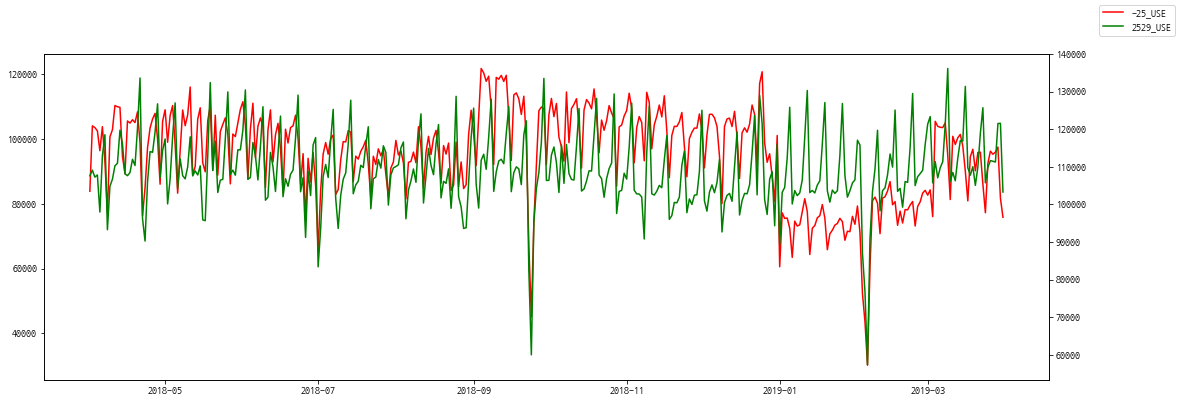

In [191]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['-25_USE'], 'r-')
ax2.plot(df_age.index, df_age['2529_USE'],'g-')
# ax1.legend('-25_USE_AMT')
# ax2.legend('2529_USE_AMT')
fig.legend(age20)

In [192]:
age30 = [
#     '-25_USE', '2529_USE',
         '3034_USE', '3539_USE',
#             '4044_USE', '4549_USE', 
#          '5054_USE', '5559_USE',
#             '6064_USE', '65-_USE'
        ]

Text(0.5, 1.0, '30대 카드사용 추이')

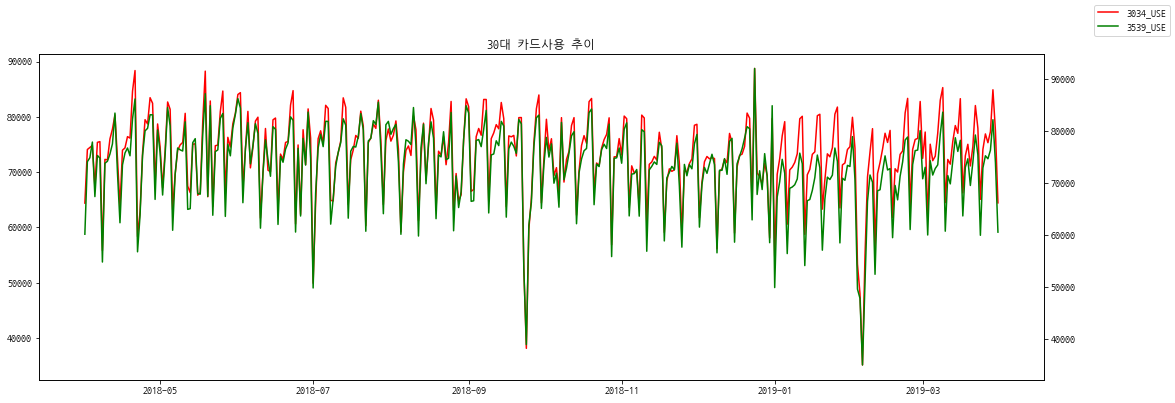

In [178]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['3034_USE'], 'r-')
ax2.plot(df_age.index, df_age['3539_USE'],'g-')
# ax1.legend('3034_USE_AMT')
# ax2.legend('3539_USE_AMT')
fig.legend(age30)
plt.title('30대 카드사용 추이')

In [77]:
age40 = [
#     '-25_USE', '2529_USE',
#          '3034_USE', '3539_USE',
            '4044_USE', '4549_USE', 
#          '5054_USE', '5559_USE',
#             '6064_USE', '65-_USE'
        ]

Text(0.5, 1.0, '일별 나이별 매출경향')

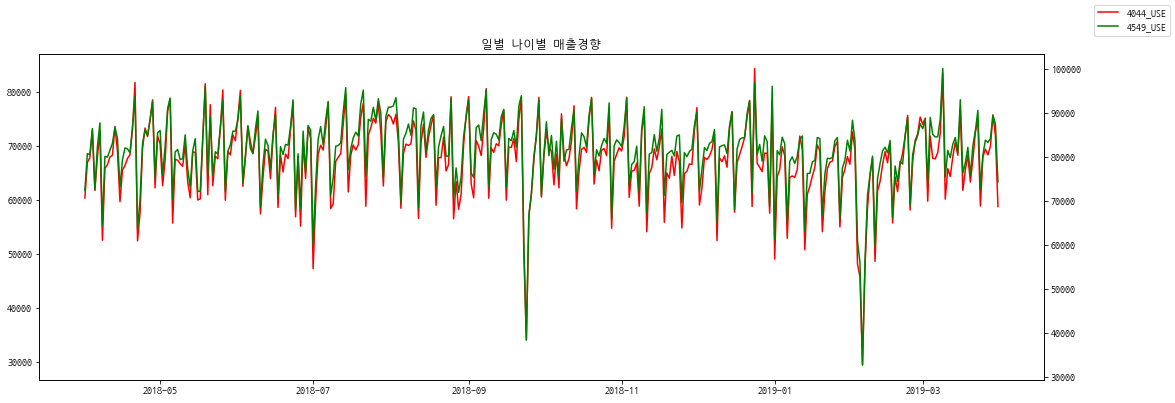

In [78]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['4044_USE'], 'r-')
ax2.plot(df_age.index, df_age['4549_USE'],'g-')
# ax1.legend('4044_USE_AMT')
# ax2.legend('4549_USE_AMT')
fig.legend(age40)
ax1.set_title('일별 나이별 매출경향')

In [79]:
age50 = [
#     '-25_USE', '2529_USE',
#          '3034_USE', '3539_USE',
#             '4044_USE', '4549_USE', 
         '5054_USE', '5559_USE',
#             '6064_USE', '65-_USE'
        ]

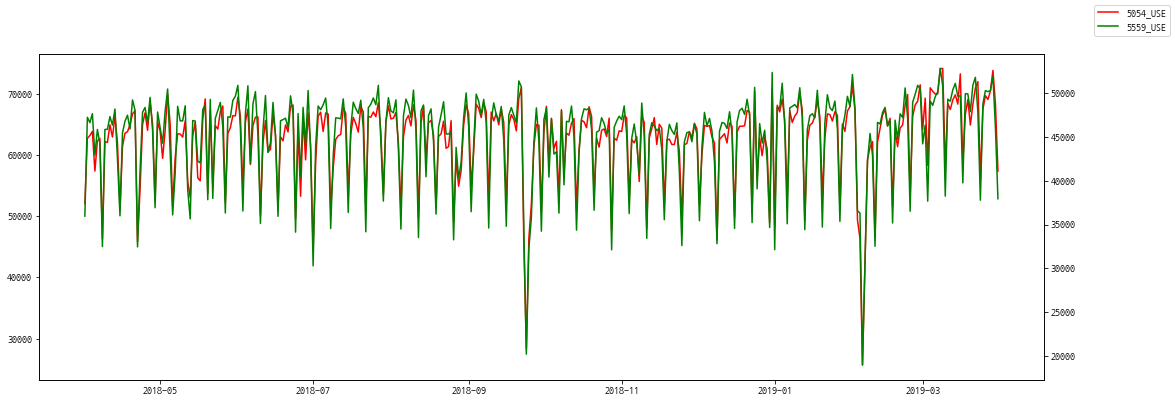

In [80]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['5054_USE'], 'r-')
ax2.plot(df_age.index, df_age['5559_USE'],'g-')
# ax1.legend('5054_USE_AMT')
# ax2.legend('5559_USE_AMT')
fig.legend(age50)

In [81]:
age60 = [
#     '-25_USE', '2529_USE',
#          '3034_USE', '3539_USE',
#             '4044_USE', '4549_USE', 
#          '5054_USE', '5559_USE',
            '6064_USE', '65-_USE'
        ]

Text(0.5, 1.0, '일별 나이별 매출경향')

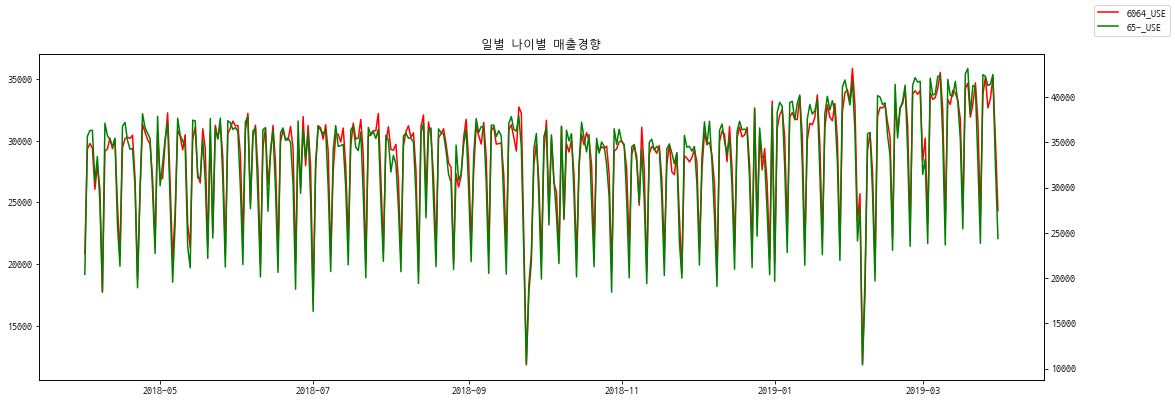

In [82]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['6064_USE'], 'r-')
ax2.plot(df_age.index, df_age['65-_USE'],'g-')
# ax3.plot(df_age.index, df_age['5559-USE_AMT'])
# ax1.legend('6064_USE_AMT')
# ax2.legend('65-_USE_AMT')
fig.legend(age60)
ax1.set_title('일별 나이별 매출경향')

In [83]:
df_asos_date = df_asos.groupby('DATE').sum().reset_index()
dateidx = pd.date_range('2018-04-01', '2019-03-31')
df_asos_date.index=dateidx
df_asos_date.drop('DATE', axis=1, inplace=True)

In [92]:
df_age_pm = df_age.merge(df_asos_date, left_on=df_age.index, right_on=df_asos_date.index).set_index('key_0')

In [100]:
df_age_pm.corr()[['pm10', 'pm25', 'CONTENT']]

,pm10,pm25,CONTENT
-25_USE,-0.284865,-0.236473,0.064534
2529_USE,0.036614,0.065733,-0.187254
3034_USE,-0.003601,0.006809,0.036961
3539_USE,-0.120346,-0.097164,0.038061
4044_USE,-0.052062,-0.018818,-0.058366
4549_USE,-0.049266,-0.010755,-0.039666
5054_USE,0.149776,0.159357,0.211137
5559_USE,0.109536,0.110021,0.292164
6064_USE,0.221072,0.208504,0.368862
65-_USE,0.215770,0.196170,0.451146


# 데이터 변환 - 10대별로 만들기

In [101]:
df_age.head()

,-25_USE,2529_USE,3034_USE,3539_USE,4044_USE,4549_USE,5054_USE,5559_USE,6064_USE,65-_USE
2018-04-01,83822,107599,64406,60135,60359,72463,52054,35952,20857,20409
2018-04-02,104000,109101,74095,74095,66928,80829,62726,47228,29307,35657
2018-04-03,103481,107242,74474,74854,67831,80635,63191,46621,29763,36308
2018-04-04,102465,107822,74833,77868,72841,86557,63848,47641,29413,36334
2018-04-05,96332,97950,67330,67372,61752,72671,57377,42916,26067,30661


In [103]:
df_age['age20'] = [df_age[['-25_USE', '2529_USE']].loc[i].sum() for i in df_age.index]

In [104]:
df_age['age30'] = [df_age[['3034_USE', '3539_USE']].loc[i].sum() for i in df_age.index]

In [105]:
df_age['age40'] = [df_age[['4044_USE', '4549_USE']].loc[i].sum() for i in df_age.index]

In [106]:
df_age['age50'] = [df_age[['5054_USE', '5559_USE']].loc[i].sum() for i in df_age.index]

In [109]:
df_age.head()

,-25_USE,2529_USE,3034_USE,3539_USE,4044_USE,4549_USE,5054_USE,5559_USE,6064_USE,65-_USE,age20,age30,age40,age50
2018-04-01,83822,107599,64406,60135,60359,72463,52054,35952,20857,20409,191421,124541,132822,88006
2018-04-02,104000,109101,74095,74095,66928,80829,62726,47228,29307,35657,213101,148190,147757,109954
2018-04-03,103481,107242,74474,74854,67831,80635,63191,46621,29763,36308,210723,149328,148466,109812
2018-04-04,102465,107822,74833,77868,72841,86557,63848,47641,29413,36334,210287,152701,159398,111489
2018-04-05,96332,97950,67330,67372,61752,72671,57377,42916,26067,30661,194282,134702,134423,100293


In [110]:
df_asos_no = pd.read_csv('../data/innovation/Merge_data/df_asos_nowon.csv')
df_asos_jong = pd.read_csv('../data/innovation/Merge_data/df_asos_jongro.csv')

In [111]:
df_asos = pd.concat([df_asos_no, df_asos_jong]).groupby(['DATE', 'GU_NM']).sum().reset_index()

In [112]:
df_asos.head()

,DATE,GU_NM,pm10,pm25,humi,temp,CONTENT,강수량(mm)
0,20180401,노원구,68.328472,35.256944,56.769284,16.578527,515,0.0
1,20180401,종로구,84.070139,43.877083,61.370139,16.692569,515,0.0
2,20180402,노원구,72.005556,29.909028,57.838777,19.628631,888,0.0
3,20180402,종로구,72.274306,30.051389,58.825694,19.561181,888,0.0
4,20180403,노원구,72.838194,24.295833,61.681723,19.191452,856,0.1


In [113]:
df_asos['DATE'] = df_asos.DATE.astype(int)

In [114]:
dateidx = pd.date_range('2018-04-01', '2019-03-31')
df_asos = df_asos.groupby('DATE').mean()
df_asos.index = dateidx

In [115]:
df_total = df_age.merge(df_asos, on=df_asos.index).set_index('key_0')

In [116]:
df_total = df_total[['CONTENT', 'pm10', 'pm25', 'age20', 'age30', 'age40', 'age50']]

In [117]:
df_total.head()

,CONTENT,pm10,pm25,age20,age30,age40,age50
key_0,,,,,,,
2018-04-01,515,76.199306,39.567014,191421,124541,132822,88006
2018-04-02,888,72.139931,29.980208,213101,148190,147757,109954
2018-04-03,856,69.500347,21.887153,210723,149328,148466,109812
2018-04-04,893,17.883724,10.842373,210287,152701,159398,111489
2018-04-05,864,10.878936,6.251308,194282,134702,134423,100293


# EDA - 나이대별 경향성보기

# 상관계수보기

### 정규화하기

In [118]:
df_total_scale = (df_total - df_total.mean())/df_total.std()

In [119]:
df_corr = df_total_scale.corr().loc[['CONTENT', 'pm10', 'pm25']][['age20', 'age30', 'age40', 'age50']]

In [120]:
df_corr['age20_cross'] = [float(np.correlate(df_total['age20'], df_total['CONTENT'])),
float(np.correlate(df_total['age20'], df_total['pm10'])),
float(np.correlate(df_total['age20'], df_total['pm25']))]

In [121]:
df_corr['age30_cross'] = [float(np.correlate(df_total['age30'], df_total['CONTENT'])),
float(np.correlate(df_total['age30'], df_total['pm10'])),
float(np.correlate(df_total['age30'], df_total['pm25']))]

In [122]:
df_corr['age40_cross'] = [float(np.correlate(df_total['age40'], df_total['CONTENT'])),
float(np.correlate(df_total['age40'], df_total['pm10'])),
float(np.correlate(df_total['age40'], df_total['pm25']))]

In [123]:
df_corr['age50_cross'] = [float(np.correlate(df_total['age50'], df_total['CONTENT'])),
float(np.correlate(df_total['age50'], df_total['pm10'])),
float(np.correlate(df_total['age50'], df_total['pm25']))]

In [124]:
df_corr

,age20,age30,age40,age50,age20_cross,age30_cross,age40_cross,age50_cross
CONTENT,-0.046360,0.037927,-0.048606,0.249455,3.845711e+10,2.765198e+10,2.807244e+10,2.056983e+10
pm10,-0.176775,-0.064788,-0.050795,0.133086,4.536142e+09,3.268352e+09,3.336821e+09,2.432672e+09
pm25,-0.129682,-0.047578,-0.014582,0.138671,2.694113e+09,1.939350e+09,1.982958e+09,1.445461e+09


<BarContainer object of 4 artists>

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


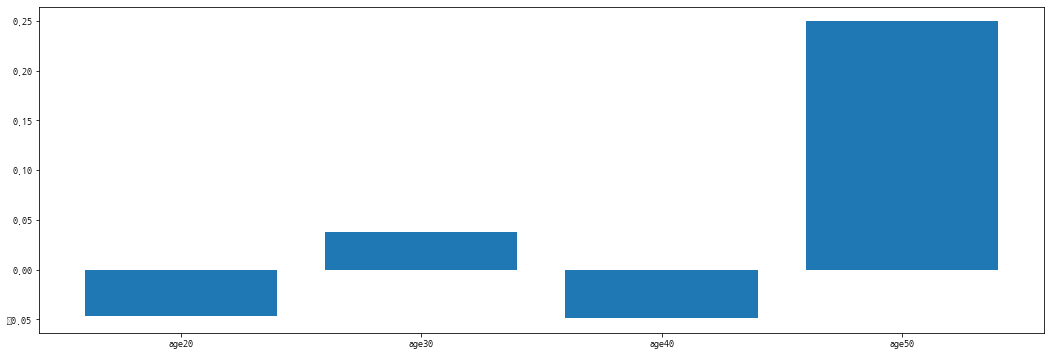

In [125]:
plt.figure(figsize=(18,6))
plt.bar(['age20', 'age30', 'age40', 'age50'], 
        df_corr.loc['CONTENT'][['age20', 'age30', 'age40', 'age50']].values)

<BarContainer object of 4 artists>

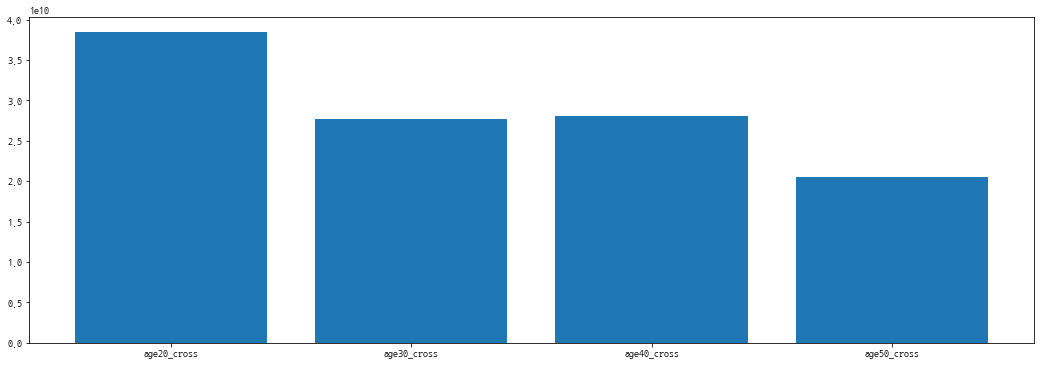

In [130]:
plt.figure(figsize=(18,6))
plt.bar(['age20_cross', 'age30_cross', 'age40_cross', 'age50_cross'],
        df_corr.loc['CONTENT'][['age20_cross', 'age30_cross', 'age40_cross', 'age50_cross']].values)

In [127]:
age20_cross = np.correlate(df_total_scale['age20'], df_total_scale['CONTENT'], mode='same')
age30_cross = np.correlate(df_total_scale['age30'], df_total_scale['CONTENT'], mode='same')
age40_cross = np.correlate(df_total_scale['age40'], df_total_scale['CONTENT'], mode='same')
age50_cross = np.correlate(df_total_scale['age50'], df_total_scale['CONTENT'], mode='same')

In [128]:
df_cross = pd.DataFrame(age20_cross, columns=['age20_cross'])
df_cross['age30_cross'] = age30_cross
df_cross['age40_cross'] = age40_cross
df_cross['age50_cross'] = age50_cross

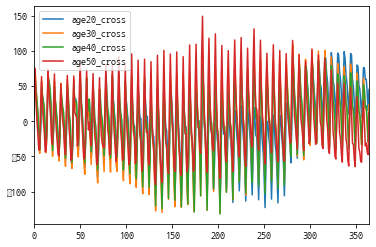

In [129]:
df_cross.plot()

# 경향성보기

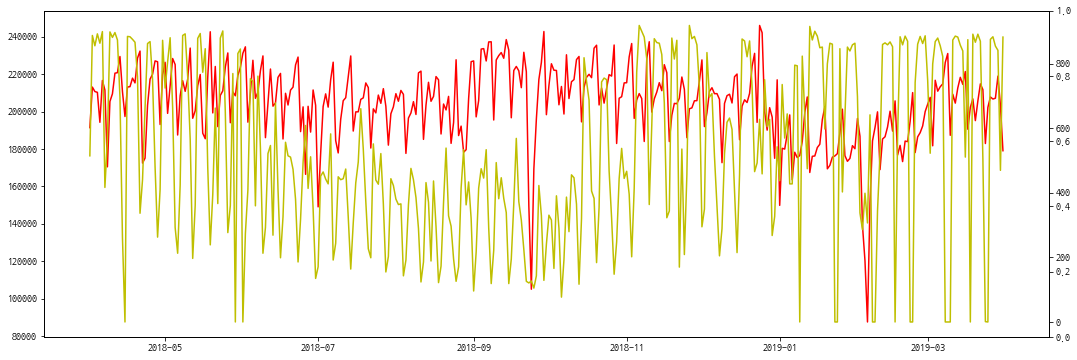

In [131]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age20'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

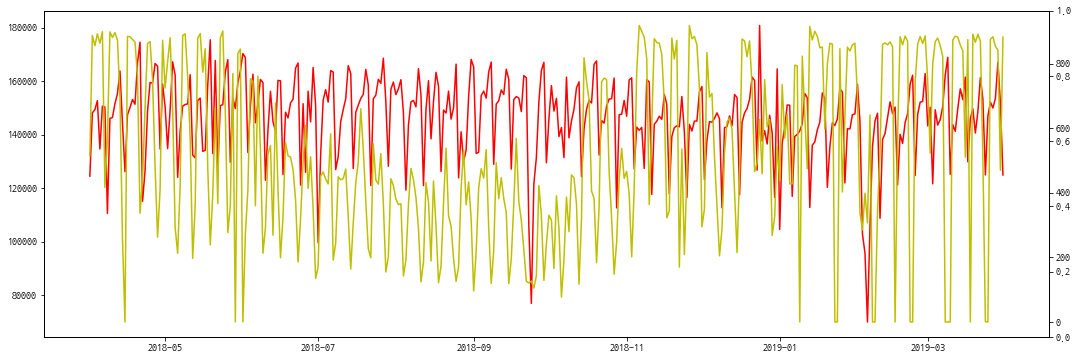

In [132]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age30'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

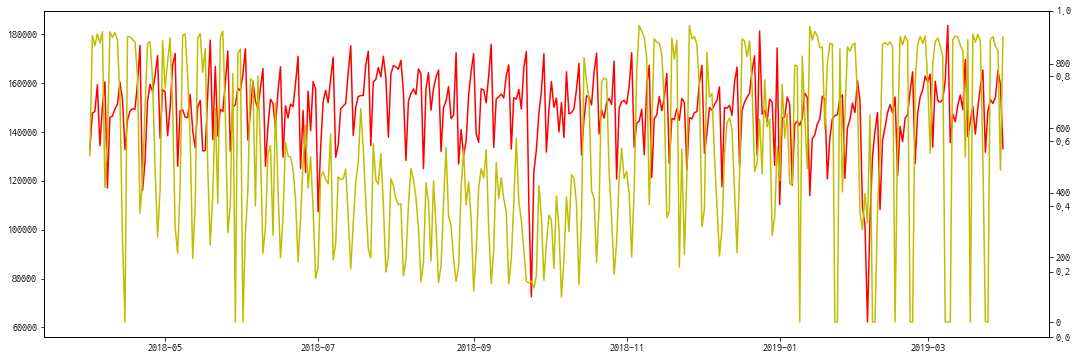

In [133]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age40'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

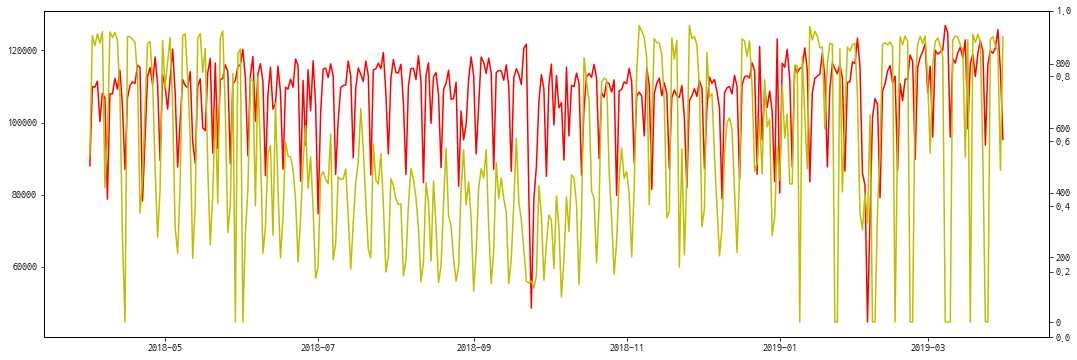

In [134]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age50'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

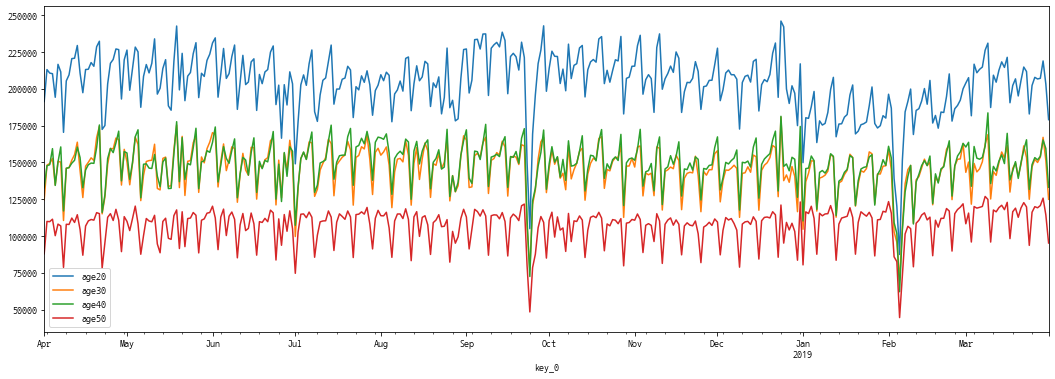

In [135]:
df_total[['age20', 'age30', 'age40', 'age50']].plot(figsize=(18,6))

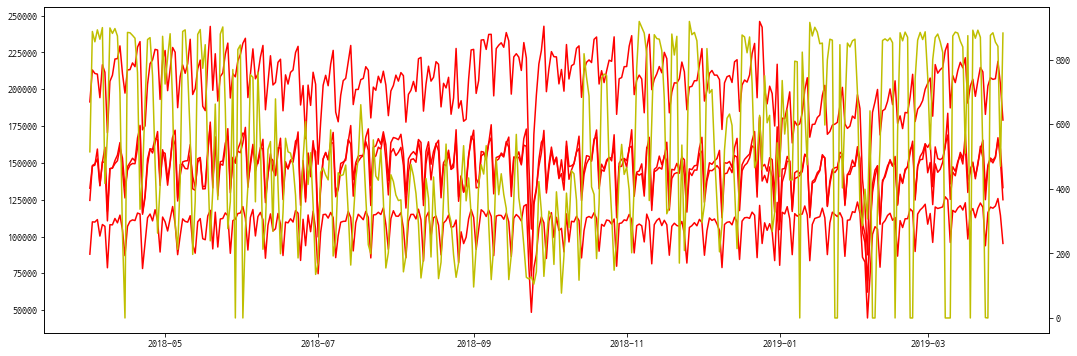

In [136]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax0.plot(df_total.index, df_total[['age20', 'age30', 'age40', 'age50']], 'r-')
ax1.plot(df_total.index, df_total[['CONTENT']], 'y-')

# EDA - 동별 나이대별 구매패턴

In [165]:
df_shinhan_nowon = df_shinhan.iloc[np.where(df_shinhan.GU_NM == "노원구")[0]]
df_shinhan_jongro = df_shinhan.iloc[np.where(df_shinhan.GU_NM == "종로구")[0]]

df_shinhan_nowon.drop(["GU_CD", "DONG_NM", "SEX_CD", "MCT_CAT_CD", "GU_NM", "USE_AMT", "DATE"], axis = 1, inplace = True)
df_shinhan_jongro.drop(["GU_CD", "DONG_NM", "SEX_CD", "MCT_CAT_CD", "GU_NM", "USE_AMT", "DATE"], axis = 1, inplace = True)

df_shinhan_nowon = df_shinhan_nowon.groupby(["DONG_CD", "AGE_CD"]).sum()
df_shinhan_jongro = df_shinhan_jongro.groupby(["DONG_CD", "AGE_CD"]).sum()

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [166]:
age_20_nowon = []
age_30_nowon = []
age_40_nowon = []
age_50_nowon = []
dongIdx_nowon = []

for i in range(len(df_shinhan_nowon.index) // 10) :
    dongIdx_nowon.append(df_shinhan_nowon.index[10*i][0])
    age_20_nowon.append(df_shinhan_nowon.iloc[10*i, 0] + df_shinhan_nowon.iloc[10*i+1, 0])
    age_30_nowon.append(df_shinhan_nowon.iloc[10*i+2, 0] + df_shinhan_nowon.iloc[10*i+3, 0])
    age_40_nowon.append(df_shinhan_nowon.iloc[10*i+4, 0] + df_shinhan_nowon.iloc[10*i+5, 0])
    age_50_nowon.append(df_shinhan_nowon.iloc[10*i+6, 0] + df_shinhan_nowon.iloc[10*i+9, 0])

In [167]:
age_20_jongro = []
age_30_jongro = []
age_40_jongro = []
age_50_jongro = []
dongIdx_jongro = []

for i in range(len(df_shinhan_jongro.index) // 10) :
    dongIdx_jongro.append(df_shinhan_jongro.index[10*i][0])
    age_20_jongro.append(df_shinhan_jongro.iloc[10*i, 0] + df_shinhan_jongro.iloc[10*i+1, 0])
    age_30_jongro.append(df_shinhan_jongro.iloc[10*i+2, 0] + df_shinhan_jongro.iloc[10*i+3, 0])
    age_40_jongro.append(df_shinhan_jongro.iloc[10*i+4, 0] + df_shinhan_jongro.iloc[10*i+5, 0])
    age_50_jongro.append(df_shinhan_jongro.iloc[10*i+6, 0] + df_shinhan_jongro.iloc[10*i+9, 0])

In [168]:
age_nowon_df = pd.DataFrame({"age20" : age_20_nowon, "age30" : age_30_nowon, "age40" : age_40_nowon, "age50" : age_50_nowon}, index = dongIdx_nowon)
age_jongro_df = pd.DataFrame({"age20" : age_20_jongro, "age30" : age_30_jongro, "age40" : age_40_jongro, "age50" : age_50_jongro}, index = dongIdx_jongro)

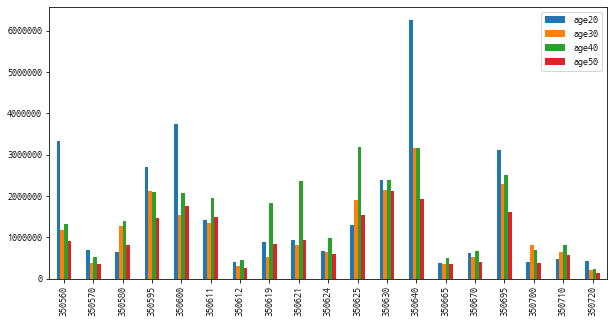

In [169]:
age_nowon_df.plot(kind = 'bar', figsize = (10, 5))

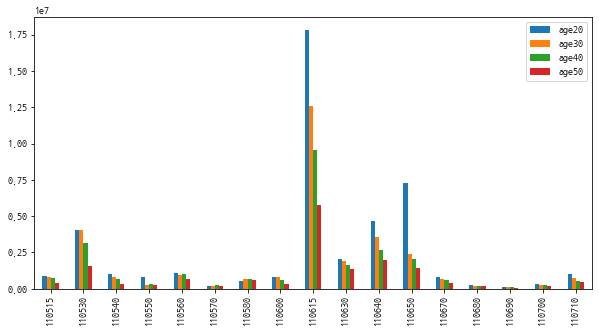

In [170]:
age_jongro_df.plot(kind = 'bar', figsize = (10, 5))

# 데이터 변환 - 나이대별로 분할

In [137]:
df_merge = df_shinhan.groupby(['DATE', 'MCT_CAT_CD', 'AGE_CD']).sum()

In [138]:
df_merge = pd.DataFrame(df_merge.USE_CNT)

In [139]:
df_merge = df_merge.unstack()

In [140]:
df_merge.columns = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

In [141]:
df_merge['age20'] = df_merge[20]+df_merge[25]
df_merge['age30'] = df_merge[30]+df_merge[35]
df_merge['age40'] = df_merge[40]+df_merge[45]
df_merge['age50'] = df_merge[50]+df_merge[55]

In [142]:
df_merge.drop([20, 25, 30, 35, 40, 45, 50, 55, 60, 65], axis=1, inplace=True)

In [143]:
df_merge = df_merge.unstack()

In [144]:
AMT_list = ['숙박_USE_AMT', '레저용품_USE_AMT','레저업소_USE_AMT', '문화취미_USE_AMT', '가구_USE_AMT', '전기_USE_AMT',
                  '주방_USE_AMT', '연료_USE_AMT', '광학_USE_AMT', '가전_USE_AMT', '유통업_USE_AMT',
                  '의복_USE_AMT', '직물_USE_AMT', '신변잡화_USE_AMT','서적문구_USE_AMT', '사무통신_USE_AMT',
                  '자동차판매_USE_AMT', '자동차정비_USE_AMT', '의료기관_USE_AMT', '보건위생_USE_AMT', '요식업소_USE_AMT',
                  '음료식품_USE_AMT', '수리서비스_USE_AMT']
age_list = ['age20', 'age30', 'age40', 'age50']

In [145]:
cols_name_list = [i+j for i in age_list for j in AMT_list]

In [146]:
df_merge.columns = cols_name_list

In [147]:
df_merge.head()

,age20숙박_USE_AMT,age20레저용품_USE_AMT,age20레저업소_USE_AMT,age20문화취미_USE_AMT,age20가구_USE_AMT,age20전기_USE_AMT,age20주방_USE_AMT,age20연료_USE_AMT,age20광학_USE_AMT,age20가전_USE_AMT,age20유통업_USE_AMT,age20의복_USE_AMT,age20직물_USE_AMT,age20신변잡화_USE_AMT,age20서적문구_USE_AMT,...,age50광학_USE_AMT,age50가전_USE_AMT,age50유통업_USE_AMT,age50의복_USE_AMT,age50직물_USE_AMT,age50신변잡화_USE_AMT,age50서적문구_USE_AMT,age50사무통신_USE_AMT,age50자동차판매_USE_AMT,age50자동차정비_USE_AMT,age50의료기관_USE_AMT,age50보건위생_USE_AMT,age50요식업소_USE_AMT,age50음료식품_USE_AMT,age50수리서비스_USE_AMT
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20180401,1117.0,521.0,11723.0,3528.0,21.0,NaN,NaN,557.0,128.0,42.0,63823.0,1793.0,31.0,1373.0,11720.0,...,28.0,68.0,37850.0,1030.0,64.0,258.0,4572.0,NaN,NaN,724.0,1691.0,2504.0,29515.0,4307.0,121.0
20180402,317.0,319.0,7993.0,1387.0,NaN,NaN,NaN,525.0,154.0,78.0,80232.0,1263.0,71.0,838.0,12144.0,...,90.0,204.0,39799.0,1137.0,152.0,396.0,4723.0,73.0,20.0,1160.0,16554.0,1944.0,33758.0,4882.0,480.0
20180403,344.0,318.0,8487.0,1308.0,16.0,NaN,18.0,448.0,155.0,94.0,78483.0,1151.0,34.0,715.0,9676.0,...,75.0,151.0,40226.0,1134.0,156.0,342.0,3970.0,49.0,NaN,1061.0,14703.0,2105.0,35557.0,5363.0,359.0
20180404,356.0,367.0,8016.0,1306.0,8.0,NaN,17.0,364.0,186.0,130.0,77982.0,1277.0,61.0,852.0,9722.0,...,97.0,157.0,41429.0,908.0,173.0,328.0,4059.0,62.0,8.0,1001.0,14164.0,1880.0,36397.0,5672.0,476.0
20180405,460.0,293.0,8899.0,1730.0,NaN,NaN,25.0,359.0,149.0,81.0,71284.0,856.0,39.0,593.0,8943.0,...,45.0,134.0,36348.0,543.0,100.0,257.0,3566.0,93.0,NaN,854.0,12968.0,1793.0,33875.0,5194.0,215.0


In [149]:
df_merge.to_csv('../data/innovation/shinhan/df_shinhan.csv', index=False)

# 2차 Merge . Gu코드 포함

In [150]:
df_merge = df_shinhan.groupby(['DATE', 'GU_NM', 'MCT_CAT_CD', 'AGE_CD']).sum()

In [151]:
df_merge = pd.DataFrame(df_merge.USE_CNT)

In [152]:
df_merge = df_merge.unstack()

In [153]:
df_merge.columns = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

In [154]:
df_merge['age20'] = df_merge[20]+df_merge[25]
df_merge['age30'] = df_merge[30]+df_merge[35]
df_merge['age40'] = df_merge[40]+df_merge[45]
df_merge['age50'] = df_merge[50]+df_merge[55]

In [155]:
df_merge.drop([20, 25, 30, 35, 40, 45, 50, 55, 60, 65], axis=1, inplace=True)

In [156]:
df_merge = df_merge.unstack()

In [157]:
nowon_idx = [(df_merge.index[i][0], '노원구') for i in range(len(df_merge)) if i % 2 ==0]
jongro_idx = [(df_merge.index[i][0], '종로구') for i in range(len(df_merge)) if i % 2 ==0]

In [158]:
df_merge_nowon = df_merge.loc[nowon_idx]
df_merge_jongro = df_merge.loc[jongro_idx]

In [159]:
df_merge_nowon = df_merge_nowon.unstack()
df_merge_jongro = df_merge_jongro.unstack()

In [160]:
AMT_list = ['숙박', '레저용품','레저업소', '문화취미', '가구', '전기',
                  '주방', '연료', '광학', '가전', '유통업',
                  '의복', '직물', '신변잡화','서적문구', '사무통신',
                  '자동차판매', '자동차정비', '의료기관', '보건위생', '요식업소',
                  '음료식품', '수리서비스']
age_list = ['age20', 'age30', 'age40', 'age50']

In [161]:
cols_name_list = [i+j for i in age_list for j in AMT_list]

In [162]:
df_merge_nowon.columns = cols_name_list
df_merge_jongro.columns = cols_name_list

In [163]:
df_merge_nowon.to_csv('../data/innovation/Merge_data/df_shinhan_nowon.csv', index=False)
df_merge_jongro.to_csv('../data/innovation/Merge_data/df_shinhan_jongro.csv', index=False)